<p align="center"><img src="../Additionals/Empa-Workshops-Template-Banner2.png" alt="University Workshops" style="display: block; margin: 0 auto" height=/></p>

# Accelerator Workshops'a Hoşgeldiniz!

Empa Electronics tarafından düzenlenen Accelerators Workshops etkinlikleri serimizin Uçta Yapay Zeka adımına hoşgeldiniz. Bu açık-kaynak repository, workshop etkiliğimizde deneyimleyeceğiniz "ST Platformları İçin Edge-AI Çözümleri Geliştirme" uygulaması çalışma ortamını edinebilmeniz ve aktivitelere kolaylıkla eşlik edebilmeniz için sizinle paylaşılmıştır.

Bu script, bir uçta yapay zeka çözümünün geliştirilme adımlarının gösterimi için oluşturulmuştur.

**Uygulama Adımları:**

1. Gereksinimlerin Dahil Edilmesi (Requirements)

2. Veri Ön-İşleme

3. Yapay Zeka Modeli Oluşturma

4. Model Eğitimi Çözüm Geliştirme (Development)

5. Modeli Dışa Aktarma & Dağıtım (Deployment)

## Kurulum (Yalnızca Bulut Çalışma Ortamı İçin)

Bu başlık, bulut çalışma ortamı için gerekli kurulumların otomatik olarak yapılması için oluşturulmuştur.  
Kurulum başlığı altındaki kod hücrelerini **YALNIZCA Google Colab** ortamı için çalıştırınız.  
  
Yerel çalışma ortamı kullanan katılımcılar **1. Gereksinimlerin Dahil Edilmesi** başlığından itibaren uygulamaya başlamalıdır.  
  
  

1. Python versiyonu olarak tercih edilen 3.10 versiyonunun kurulu olduğunu teyit ediniz.

In [ ]:
!python3 --version

2. Gerekli klasör ve kaynak dosyalarını oluşturunuz/indiriniz.

In [ ]:
!mkdir -p Datasets && mkdir -p Models
!wget https://raw.githubusercontent.com/Empa-Teknoloji/AI_Workshop/master/Activity2_Bare-Metal_Edge-AI_Solution/Datasets/Dataset_Hand_Character_Recognition_EmpaElectronics.csv -O Datasets/Dataset_Hand_Character_Recognition_EmpaElectronics.csv

3. Gerekli Python modüllerini edininiz.

In [ ]:
!pip3 install -r https://raw.githubusercontent.com/Empa-Teknoloji/AI_Workshop/master/Activity2_Bare-Metal_Edge-AI_Solution/requirements.txt

## 1. Gereksinimlerin Dahil Edilmesi

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from math import floor
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

2024-06-06 15:45:07.911836: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 15:45:08.213327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 15:45:08.214482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 15:45:09.143410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path_dataset = "./Datasets/Dataset_Hand_Character_Recognition_EmpaElectronics.csv"

## 2. Veri Ön-İşleme

### 2.1. Ham Veri Eldesi

In [3]:
df_dataset = pd.read_csv(path_dataset)
df_dataset

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,class
0,68,1308,-151,-556,-308,-322,0
1,-153,1317,-167,-976,-56,-680,0
2,-446,1300,-78,-1376,227,-863,0
3,-597,1316,72,-1602,424,-781,0
4,-618,1377,246,-1558,477,-521,0
...,...,...,...,...,...,...,...
422139,74,-384,347,133,-482,-57,4
422140,142,-436,371,277,-461,-48,4
422141,154,-463,371,434,-427,-43,4
422142,162,-380,359,583,-365,-45,4


### 2.2. "Feature" & "Labels" Ayrıştırımı

In [4]:
df_feats, df_labels = df_dataset.drop(columns=["class"]), df_dataset["class"]

Veri seti "feature" sütunları:

In [5]:
df_feats

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,68,1308,-151,-556,-308,-322
1,-153,1317,-167,-976,-56,-680
2,-446,1300,-78,-1376,227,-863
3,-597,1316,72,-1602,424,-781
4,-618,1377,246,-1558,477,-521
...,...,...,...,...,...,...
422139,74,-384,347,133,-482,-57
422140,142,-436,371,277,-461,-48
422141,154,-463,371,434,-427,-43
422142,162,-380,359,583,-365,-45


Veri seti "label" sütunu:

In [6]:
df_labels

0         0
1         0
2         0
3         0
4         0
         ..
422139    4
422140    4
422141    4
422142    4
422143    4
Name: class, Length: 422144, dtype: int64

Feature ve Label dataframe yapıları için "null" değer kontrolü:

In [7]:
print(f"[features] Number of NAs: {df_feats.isna().sum().sum()}")
print(f"[features] Number of nulls: {df_feats.isnull().sum().sum()}")
print(f"[labels] Number of NAs: {df_labels.isna().sum().sum()}")
print(f"[labels] Number of nulls: {df_labels.isnull().sum().item()}")

[features] Number of NAs: 0
[features] Number of nulls: 0
[labels] Number of NAs: 0
[labels] Number of nulls: 0


Veri seti sınıflarının listesi:

In [8]:
list_categories = np.array(sorted(set(df_labels.to_numpy().flatten()))).reshape(-1, 1)
list_categories

array([[0],
       [1],
       [2],
       [3],
       [4]])

### 2.3. "Label Encoding" Uygulanması 

Scitkit-learn içinden **One-Hot Encoder** çağrımı:

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

Encoder yapısının veri seti sınıfları için fit edilmesi: 

In [10]:
encoder.fit(list_categories)

OneHotEncoder(sparse_output=False)

One-Hot Encoder içerisinde listelenen veri seti sınıfları:

In [11]:
encoder.categories_

[array([0, 1, 2, 3, 4])]

One-Hot dönüşümü uygulanmış label değerlerinin eldesi:

In [12]:
df_labels_ohe = pd.DataFrame(encoder.transform(df_labels.to_numpy().reshape(-1, 1)))
df_labels_ohe

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
422139,0.0,0.0,0.0,0.0,1.0
422140,0.0,0.0,0.0,0.0,1.0
422141,0.0,0.0,0.0,0.0,1.0
422142,0.0,0.0,0.0,0.0,1.0


### 2.4. Veri Setinden Sekans Paketleri (Sequence Batchs) Oluşturulması

Sabit bir sekans uzunluğu (sequence lenght) ve örtüşme oranı (overlapping ratio) tanımlaması:  
  
Sekans uzunluğu, bir tablo veri seti içerisindeki örneklerin (örneğin: sensör verisi kaydı) tekil olarak değerlendirilmesi yerine bir pencere/sekans örneği içerisinde veri kesitleri olarak ifade edilmesinde kullanılan bir sabittir.  
  
Örnek:   
Başlangıçta 1000 veri örneği ve 6 feature'dan oluşan bir veri seti için (_veri seti boyutu: 1000 x 6_)  
"sekans uzunluğu = 200 örnek" olarak seçilir ve veri setine uygulanırsa 

5 adet 200 örnekli sekans paketi elde edilmiş olur (_veri seti yeni boyutu: 5 x 200 x 6_).


In [13]:
seq_length = 128
overlapping_ratio = 0.33

Sekans paketleri oluşturma fonksiyonunun tanımlanması

In [14]:
def create_sequences(data, labels, num_samples=104, overlap=0.5):
    """Takes tabular data and creates times sequences with given sample width."""

    # create empty lists for stacking
    data_sequences = []
    data_labels = []
    # get the number of examples
    num_examples = data.shape[0]
    # compute stride value
    strides = num_samples - floor(num_samples * overlap)
    # compute the number of sequences to use as iterator
    num_sequences = floor((num_examples - num_samples) / strides) + 1

    # iterate for sequence range
    for ind in range(num_sequences):

        # define start index
        ind_start = ind * strides
        # define end index
        ind_end = ind_start + num_samples
        # get the current data slice by using start and end indexes
        slice_seq_acc = data.values[ind_start:ind_end]
        # get the current labels slice by using start and end indexes
        slice_seq_label = labels.values[ind_start:ind_end]

        # take the modal value of label slice: (replace with .mode())
        label_seq = mode(slice_seq_label, keepdims=True)[0][0]

        # stack current slices
        data_sequences.append(slice_seq_acc)
        data_labels.append(label_seq)

    # convert stacks to numpy array
    data_sequences = np.array(data_sequences)
    data_labels = np.array(data_labels)

    # return sequence and label stacks as X and Y
    return data_sequences, data_labels

Orijinal veri setinden sekans paketleri içeren veri setinin eldesi:

In [15]:
x_feats_seq, y_labels_seq = create_sequences(
                                    data= df_feats,
                                    labels= df_labels_ohe,
                                    num_samples= seq_length,
                                    overlap=overlapping_ratio)

In [16]:
print("Shape of Sequence Features:" , x_feats_seq.shape)
print("Shape of Sequence Labels:" , y_labels_seq.shape)

Shape of Sequence Features: (4908, 128, 6)
Shape of Sequence Labels: (4908, 5)


### 2.5. Train and Test Veri Setlerinin Ayrımı

Train/Test bölme oranı tanımlanması:

In [17]:
test_split_ratio = 0.1

Veri setinin bölünmesi:

In [18]:
x_train_seq, x_test_seq, y_train_seq, y_test_seq = train_test_split(x_feats_seq, y_labels_seq, test_size=test_split_ratio, shuffle=True)

In [19]:
print(f"Shapes of Train Set - Features: {x_train_seq.shape} - Labels: {y_train_seq.shape}")
print(f"Shapes of Test Set - Features: {x_test_seq.shape} - Labels: {y_test_seq.shape} ")

Shapes of Train Set - Features: (4417, 128, 6) - Labels: (4417, 5)
Shapes of Test Set - Features: (491, 128, 6) - Labels: (491, 5) 


## 3. Yapay Zeka Modelinin Oluşturulması

### 3.1. Model Oluşturma

1-D CNN modeli için model oluşturma fonksiyonunun tanımlanması:

In [20]:
def create_cnn_model(input_shape, output_shape):

        """Creates 1D-CNN model for sequence processing.

        Parameters:
            - input_shape: model input shape
            - output_shape: model output shape (number of classes)
        returns:
            - model: keras Sequential CNN model
        """

        model_cnn = Sequential(name="model_CNN")
        # Layer-1: Conv1D
        model_cnn.add(
            Conv1D(
                filters=64,
                kernel_size=3,
                activation="relu",
                padding="valid",
                strides=1,
                input_shape=input_shape,
            )
        )
        # Layer-2: Conv1D
        model_cnn.add(
            Conv1D(filters=32, kernel_size=3, activation="relu", padding="valid", strides=1)
        )
        # Layer-3: Dropout
        model_cnn.add(Dropout(0.4))
        # Layer-4: MaxPooling
        model_cnn.add(MaxPooling1D(pool_size=2, strides=2))
        # Layer-5: Flattening
        model_cnn.add(Flatten())
        # Layer-6: Fully-Connected
        model_cnn.add(Dense(units=32, activation="relu"))
        # Layer-Output: Softmax
        model_cnn.add(Dense(units=output_shape, activation="softmax"))
        # return CNN model object
        return model_cnn

Ardından, öncesinde tanımlanan model oluşturma fonksiyonunu kullanan model eğitim fonksiyonunun tanımlaması: 

In [21]:
def train_model(X, y, max_epochs=500, batch_size=128, lr=0.001, X_val=None, y_val=None):

    # get seq lenght and num of features
    seq_length, num_features = X.shape[1:]
    # get number of features and define input shape
    input_shape_cnn = seq_length, num_features
    # define output shape
    output_classes_cnn = y[0].size
    print("model input shape:", input_shape_cnn)
    print("output input shape:", output_classes_cnn)

    # create CNN model instance
    model = create_cnn_model(input_shape_cnn, output_classes_cnn)

    # compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["categorical_accuracy"],
    )
    # define EarlyStopping callback
    callback_early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="loss", min_delta=0, patience=10
    )
    # train a model for current param. combination
    history = model.fit(
        X,
        y,
        epochs=max_epochs,
        batch_size=batch_size,
        callbacks=[callback_early_stopping],
        validation_data=(X_val, y_val), # if  isinstance(None, (type(X_val), type(y_val))) else None,
    )

    # return training history and trained model
    return history, model

### 3.2. Model Eğitimi

In [22]:
history_cnn, model_cnn = train_model(X=x_train_seq,
                                     y=y_train_seq,
                                     X_val=x_test_seq,
                                     y_val=y_test_seq,
                                     lr=0.0003,
)

model input shape: (128, 6)
output input shape: 5
Epoch 1/500


2024-06-06 15:46:08.872265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-06 15:46:09.009667: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


35/35 [==============================] - 2s 30ms/step - loss: 115.7549 - categorical_accuracy: 0.3403 - val_loss: 27.2946 - val_categorical_accuracy: 0.4827
Epoch 2/500
35/35 [==============================] - 1s 24ms/step - loss: 30.2149 - categorical_accuracy: 0.5017 - val_loss: 7.8680 - val_categorical_accuracy: 0.5234
Epoch 3/500
35/35 [==============================] - 1s 24ms/step - loss: 8.0958 - categorical_accuracy: 0.4899 - val_loss: 1.7940 - val_categorical_accuracy: 0.4053
Epoch 4/500
35/35 [==============================] - 1s 22ms/step - loss: 2.2729 - categorical_accuracy: 0.4236 - val_loss: 1.4968 - val_categorical_accuracy: 0.3360
Epoch 5/500
35/35 [==============================] - 1s 23ms/step - loss: 1.7284 - categorical_accuracy: 0.3862 - val_loss: 1.4525 - val_categorical_accuracy: 0.3259
Epoch 6/500
35/35 [==============================] - 1s 24ms/step - loss: 1.6256 - categorical_accuracy: 0.3665 - val_loss: 1.4837 - val_categorical_accuracy: 0.3055
Epoch 7/500


### 3.3. Sonuçların Değerlendirilmesi

Eğitim performans grafiğinin incelenmesi:

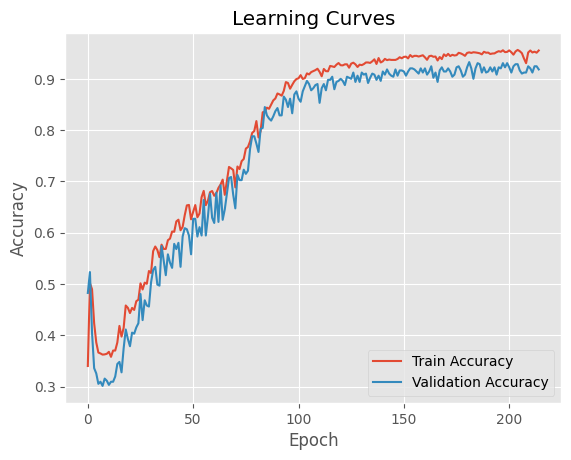

In [23]:
plt.style.use("ggplot")
plt.plot(history_cnn.history["categorical_accuracy"], label="Train Accuracy")
plt.plot(history_cnn.history["val_categorical_accuracy"], label="Validation Accuracy")
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

Confusion Matrix'in incelenmesi:

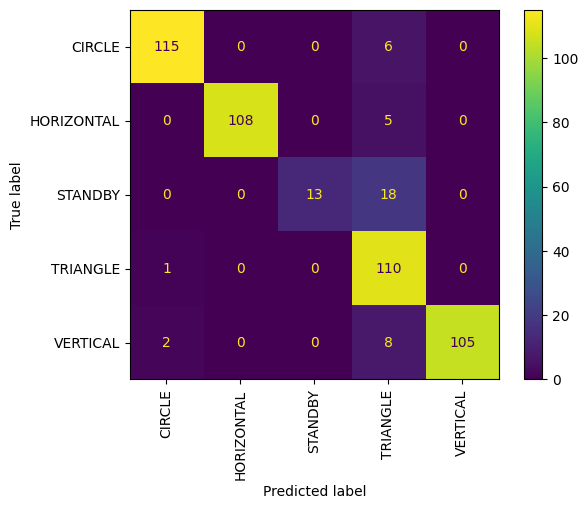

In [24]:
# class ID to class name mapping
classes = {0: "CIRCLE",
           1: "HORIZONTAL",
           2: "STANDBY",
           3: "TRIANGLE",
           4: "VERTICAL"}

# plotting the confusion matrix
plt.style.use("default")
y_pred = model_cnn(x_test_seq)
y_pred_argmaxed = np.argmax(y_pred, axis=1)
y_test_argmaxed = np.argmax(y_test_seq.astype(int), axis=1)
y_pred_named = np.vectorize(classes.get)(y_pred_argmaxed)
y_test_named = np.vectorize(classes.get)(y_test_argmaxed)
ConfusionMatrixDisplay.from_predictions(y_test_named, y_pred_named)
plt.xticks(rotation=90)
plt.show()

## 4. Eğitilmiş Modelin Dışa Aktarımı

Geliştirme ortamı belleğinde tutulan yapay zeka modelinin (mimari + öğrenilmiş parametreler) çözüme dönüştürülmesi için statik bir dosya halinde saklanması gerekmektedir.

Model eğitim tarihçesi içerisinden model doğruluk değerinin eldesi: 

In [25]:
accuracy = history_cnn.history["val_categorical_accuracy"][-1]
accuracy = round(accuracy, 4)
accuracy_for_naming = str(accuracy).replace(".", "_")
accuracy

0.9185

### 4.1. Dışa Aktarma: H5 File ve/veya Keras

In [ ]:
model_cnn.save(f"Models/Model_CNN_Hand_Character_Recognition_{accuracy_for_naming}.h5")

In [ ]:
model_cnn.save(f"Models/Model_CNN_Hand_Character_Recognition_{accuracy_for_naming}.keras")

### 4.2. Dışa Aktarma: TFLite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn)
tflite_model = converter.convert()

# Save the model.
with open(f'Models/Model_CNN_Hand_Character_Recognition_{accuracy_for_naming}.tflite', 'wb') as f:
  f.write(tflite_model)

### 4.3. Dışa Aktarma: ONNX

In [ ]:
import tf2onnx
import onnx
import onnxruntime as ort

In [ ]:
x_val = np.ones((1, 128, 6), np.float32)
input_signature = [tf.TensorSpec([None, 128, 6], tf.float32, name='x')]
onnx_model, _ = tf2onnx.convert.from_keras(model_cnn, input_signature, opset=13)

print("Keras result")
print(model_cnn(x_val).numpy())

print("ONNX RunTime result")
sess = ort.InferenceSession(onnx_model.SerializeToString())
res = sess.run(None, {'x': x_val})
print(res[0])

In [ ]:
onnx.save(onnx_model, f"Models/Model_CNN_Hand_Character_Recognition_{accuracy_for_naming}.onnx")

## 5. Kaydedilen Modelin Test Edilmesi

In [ ]:
import tensorflow as tf
model_loaded = tf.keras.models.load_model(f"Models/Model_CNN_Hand_Character_Recognition_{accuracy_for_naming}.keras")

In [ ]:
model_loaded.summary()

## 6. Eğitilen Model İle Uçta Yapay Zeka Çözümü

_Eğilen modelin ST platformlarında çözüm olarak dağıtılması adımı için STM32CubeAI aracı ile devam ediniz._